# Interval Operations

In [1]:
import itertools

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import bioframe as bf
import bioframe.vis

### Example interval sets

In [2]:
df1 = pd.DataFrame([
    ['chr1', 1, 5],
    ['chr1', 3, 8],
    ['chr1', 8, 10],
    ['chr1', 12, 14]],
    columns=['chrom', 'start', 'end']
)

df2 = pd.DataFrame([
    ['chr1', 4, 8],
    ['chr1', 10, 11]],
    columns=['chrom', 'start', 'end']
)

Text(0.5, 1.0, 'set 2')

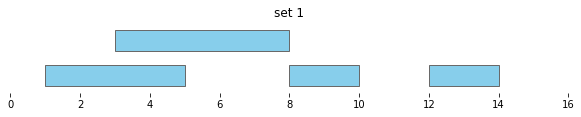

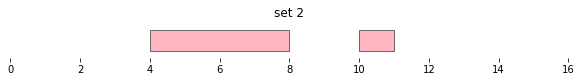

In [3]:
bf.vis.plot_intervals(df1, show_coords=True, xlim=(0,16))
plt.title('set 1')

bf.vis.plot_intervals(df2, show_coords=True, xlim=(0,16), colors='lightpink')
plt.title('set 2')

### Overlap

In [4]:
overlapping_intervals = bf.overlap(df1, df2, how='inner')
display(overlapping_intervals)

,chrom_1,start_1,end_1,chrom_2,start_2,end_2
0,chr1,1,5,chr1,4,8
1,chr1,3,8,chr1,4,8


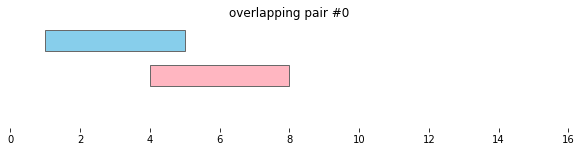

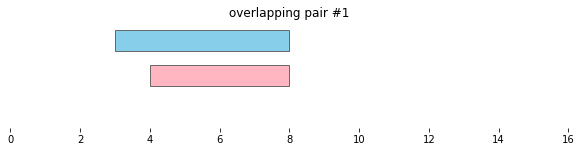

In [5]:
for i, reg_pair in overlapping_intervals.iterrows(): 
    bf.vis.plot_intervals_arr(
        starts = [reg_pair.start_1,reg_pair.start_2],
        ends = [reg_pair.end_1,reg_pair.end_2],
        colors = ['skyblue', 'lightpink'],
        levels = [2,1],
        xlim = (0,16),
        show_coords = True)
    plt.title(f'overlapping pair #{i}')

### Cluster

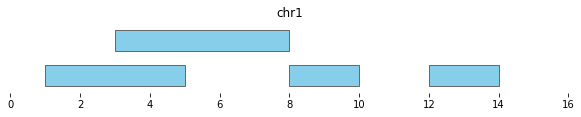

In [6]:
df1 = pd.DataFrame([
    ['chr1', 1, 5],
    ['chr1', 3, 8],
    ['chr1', 8, 10],
    ['chr1', 12, 14],
    ],
    columns=['chrom', 'start', 'end']
)

bf.vis.plot_intervals(df1, show_coords=True, xlim=(0,16))

,chrom,start,end,cluster,cluster_start,cluster_end
0,chr1,1,5,0,1,10
1,chr1,3,8,0,1,10
2,chr1,8,10,0,1,10
3,chr1,12,14,1,12,14


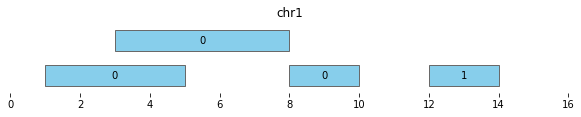

In [7]:
df_annotated = bf.cluster(df1, min_dist=0)
display(df_annotated)
bf.vis.plot_intervals(df_annotated, labels=df_annotated['cluster'], show_coords=True, xlim=(0,16))

,chrom,start,end,cluster,cluster_start,cluster_end
0,chr1,1,5,0,1,8
1,chr1,3,8,0,1,8
2,chr1,8,10,1,8,10
3,chr1,12,14,2,12,14


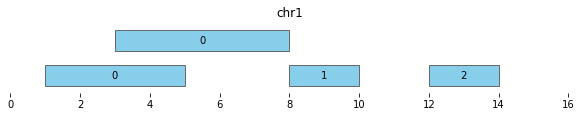

In [8]:
df_annotated = bf.cluster(df1, min_dist=None)
display(df_annotated)
bf.vis.plot_intervals(df_annotated, labels=df_annotated['cluster'], show_coords=True, xlim=(0,16))

,chrom,start,end,cluster,cluster_start,cluster_end
0,chr1,1,5,0,1,14
1,chr1,3,8,0,1,14
2,chr1,8,10,0,1,14
3,chr1,12,14,0,1,14


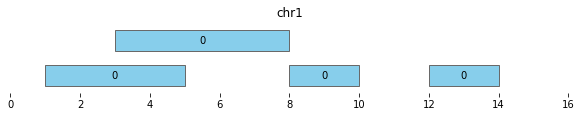

In [9]:
df_annotated = bf.cluster(df1, min_dist=2)
display(df_annotated)
bf.vis.plot_intervals(df_annotated, labels=df_annotated['cluster'], show_coords=True, xlim=(0,16))

### Merge

,chrom,start,end,n_intervals
0,chr1,1,10,3
1,chr1,12,14,1


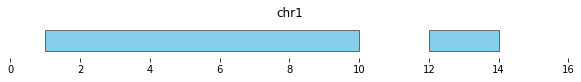

In [10]:
df_merged = bf.merge(df1, min_dist=0)

display(df_merged)
bf.vis.plot_intervals(df_merged, show_coords=True, xlim=(0,16))

,chrom,start,end,n_intervals
0,chr1,1,8,2
1,chr1,8,10,1
2,chr1,12,14,1


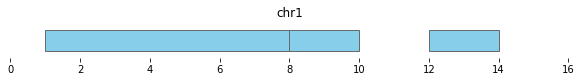

In [11]:
df_merged = bf.merge(df1, min_dist=None)
display(df_merged)
bf.vis.plot_intervals(df_merged, show_coords=True, xlim=(0,16))

### Complement

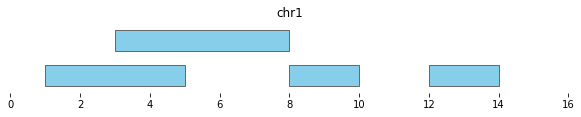

In [12]:
bf.vis.plot_intervals(df1, show_coords=True, xlim=(0,16))

In [13]:
df_complemented = bf.complement(df1)
display(df_complemented)

,chrom,start,end,view_region
0,chr1,0,1,chr1
1,chr1,10,12,chr1
2,chr1,14,9223372036854775807,chr1


,chrom,start,end,view_region
0,chr1,0,1,chr1
1,chr1,10,12,chr1
2,chr1,14,16,chr1


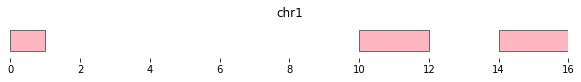

In [14]:
df_complemented = bf.complement(df1, view_df={'chr1':16})
display(df_complemented)
bf.vis.plot_intervals(df_complemented, show_coords=True, xlim=(0,16), colors='lightpink')

### Closest

In [15]:
bf.closest(df1, df2)

,chrom_1,start_1,end_1,chrom_2,start_2,end_2,distance
0,chr1,1,5,chr1,4,8,0
1,chr1,3,8,chr1,4,8,0
2,chr1,8,10,chr1,4,8,0
3,chr1,12,14,chr1,10,11,1


In [16]:
bf.closest(df1, df2, return_input=2)

,chrom_2,start_2,end_2,distance
0,chr1,4,8,0
1,chr1,4,8,0
2,chr1,4,8,0
3,chr1,10,11,1


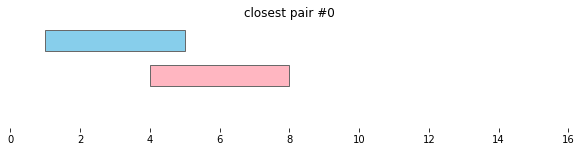

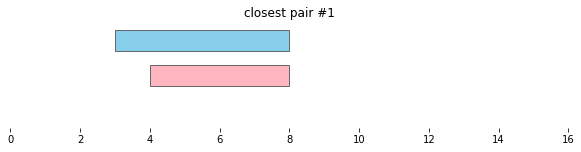

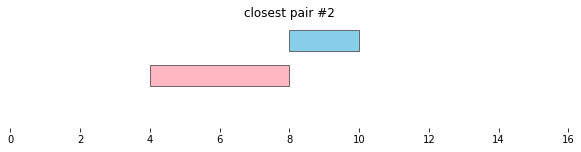

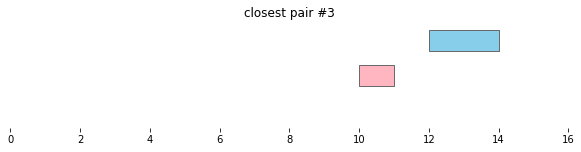

In [17]:
closest_intervals = bf.closest(df1, df2)
for i, reg_pair in closest_intervals.iterrows(): 
    bf.vis.plot_intervals_arr(
        starts = [reg_pair.start_1,reg_pair.start_2],
        ends = [reg_pair.end_1,reg_pair.end_2],
        colors = ['skyblue', 'lightpink'],
        levels = [2,1],
        xlim = (0,16),
        show_coords = True)
    plt.title(f'closest pair #{i}')

In [18]:
bf.closest(df1, None, k=2)

,chrom_1,start_1,end_1,chrom_2,start_2,end_2,distance
0,chr1,1,5,chr1,3,8,0
1,chr1,1,5,chr1,8,10,3
2,chr1,3,8,chr1,1,5,0
3,chr1,3,8,chr1,8,10,0
4,chr1,8,10,chr1,3,8,0
5,chr1,8,10,chr1,12,14,2
6,chr1,12,14,chr1,8,10,2
7,chr1,12,14,chr1,3,8,4


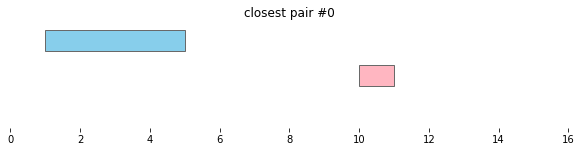

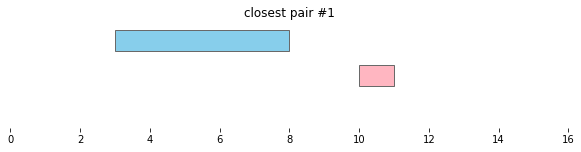

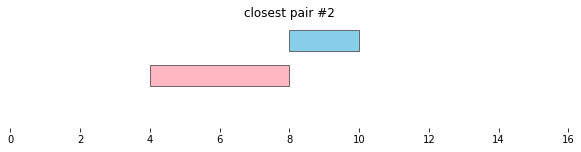

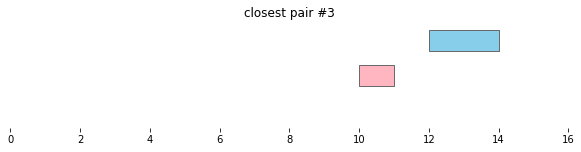

In [19]:
closest_intervals = bf.closest(df1, df2, ignore_overlaps=True)
for i, reg_pair in closest_intervals.iterrows(): 
    bf.vis.plot_intervals_arr(
        starts = [reg_pair.start_1,reg_pair.start_2],
        ends = [reg_pair.end_1,reg_pair.end_2],
        colors = ['skyblue', 'lightpink'],
        levels = [2,1],
        xlim = (0,16),
        show_coords = True)
    plt.title(f'closest pair #{i}')

In [20]:
bf.closest(df1, None)

,chrom_1,start_1,end_1,chrom_2,start_2,end_2,distance
0,chr1,1,5,chr1,3,8,0
1,chr1,3,8,chr1,1,5,0
2,chr1,8,10,chr1,3,8,0
3,chr1,12,14,chr1,8,10,2


### Coverage

In [21]:
df1_coverage = bf.coverage(df1, df2)
df1_coverage

,chrom,start,end,coverage
0,chr1,1,5,1
1,chr1,3,8,4
2,chr1,8,10,0
3,chr1,12,14,0


### Overlaps

In [22]:
n_overlaps = bf.overlap(df1, df2, return_index=True).groupby('index_1').agg({"index_2": "count"})
df1_n_overlaps = ( pd.Series(np.zeros(df1.shape[0], dtype=np.int64), index=df1.index)
                    .add(n_overlaps["index_2"], fill_value=0)
                    .astype(np.int64) )
df1_coverage['n_overlaps'] = df1_n_overlaps
df1_coverage

,chrom,start,end,coverage,n_overlaps
0,chr1,1,5,1,1
1,chr1,3,8,4,1
2,chr1,8,10,0,0
3,chr1,12,14,0,0


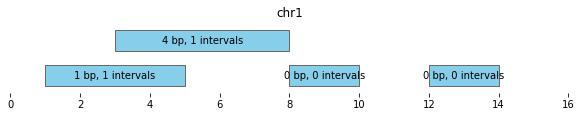

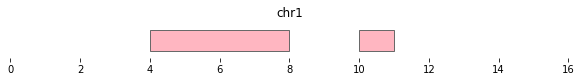

In [23]:
bf.vis.plot_intervals(
    df1_coverage, 
    show_coords=True, xlim=(0,16), 
    labels = [f'{cov} bp, {n} intervals' 
              for cov, n in zip(df1_coverage.coverage, df1_coverage['n_overlaps'])])

bf.vis.plot_intervals(df2, show_coords=True, xlim=(0,16), colors='lightpink')


### Column names

Genomic analyses often deal with dataframes with inhomogeneously named columns. Bioframe offers a way to set the default column names that are most convenient for your analyses. 

Default bedframe column names are stored in bioframe.core.specs_rc. 

In [24]:
bf.core.specs._rc

{'colnames': {'chrom': 'chrom', 'start': 'start', 'end': 'end'}}

If the dataframes we wish to work with have `['CHROMOSOME', 'LEFT', 'RIGHT']`, we can either pass cols to operations in bioframe.ops:

In [25]:
df1_diff_colnames = pd.DataFrame([
    ['chr1', 1, 5],
    ['chr1', 3, 8]],
    columns=['CHROMOSOME', 'LEFT', 'RIGHT']
)

df2_diff_colnames = pd.DataFrame([
    ['chr1', 4, 8],
    ['chr1', 10, 11]],
    columns=['CHROMOSOME', 'LEFT', 'RIGHT']
)

In [26]:
bf.overlap(
    df1_diff_colnames, df2_diff_colnames,
    cols1=['CHROMOSOME', 'LEFT', 'RIGHT'],
    cols2=['CHROMOSOME', 'LEFT', 'RIGHT'],
)

,CHROMOSOME_1,LEFT_1,RIGHT_1,CHROMOSOME_2,LEFT_2,RIGHT_2
0,chr1,1,5,chr1,4,8
1,chr1,3,8,chr1,4,8


Or, we can update the default column names:

In [27]:
with bf.core.specs.update_default_colnames(['CHROMOSOME', 'LEFT', 'RIGHT']):
    display(bf.overlap(
        df1_diff_colnames, df2_diff_colnames,
    ))

,CHROMOSOME_1,LEFT_1,RIGHT_1,CHROMOSOME_2,LEFT_2,RIGHT_2
0,chr1,1,5,chr1,4,8
1,chr1,3,8,chr1,4,8


In [28]:
# setting colnames back to default.
bf.core.specs.update_default_colnames(['chrom', 'start', 'end'])
bf.core.specs._rc

{'colnames': {'chrom': 'chrom', 'start': 'start', 'end': 'end'}}